# Project: Movie Data Exploration

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

Everyone likes movies (at least certain kinds of movies), and our task for this project is to explore as much as we can to see what insights we could uncover from this movies dataset.

We have outlined 3 major questions we seek to answer with this dataset, which are:

1. Finding the movie with the highest revenue generated
2. The most popular movie
3. Movie with the highest number of average votes

### About the dataset

The TMDB dataset is a collection of data from various movies released over the years.  It contains details such as:
Movie popularity
Revenue
Year released
Genres
vote counts etc.

In [2]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling

In this section of our data analysis process, we'll examine our dataset to ensure that it is ready and prepared for analysis by detecting and fixing any errors that may become bottlenecks to our analysis.

### General Properties

##### Check that columns are properly named and in the right format
##### Check for missing values
##### Confirm consistency and accuracy in column data types

In [5]:
# Load dataset
movie_data = pd.read_csv('tmdb-movies.csv')

movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# Investigating column names for consistency
movie_data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
# Drop columns not needed for analysis
movie_data = movie_data.drop(['imdb_id','cast', 'homepage', 'tagline', 'keywords', 'overview', ], axis=1)

In [8]:
movie_data.shape

(10866, 15)

In [9]:
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
movie_data.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

All columns have the correct data except for the release date. Since we would not be needing it for our analysis then we do not need to make any changes to the data type.

Let's proceed to check for missing values

In [11]:
movie_data.isnull().any()

id                      False
popularity              False
budget                  False
revenue                 False
original_title          False
director                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [12]:
movie_data.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Looks like we have some missing values in the [director, genres, and production_companies] columns.

We will address this issue when we behgin to clean our data. Let's keep that in mind.

### Data Cleaning

Here, we'll make adjustments to our dataset where necessary to remove any inconsistencies that will affect our analysis.

First thing we'll do is ensure that our missing values are fixed. For this task, we'll imput the missing values with the string "missing" since they are categorical variables.

In [13]:
# Calculate the mode for the columns and assign them to the missing columns

movie_data['director'] = movie_data['director'].fillna('Missing')
movie_data['genres'] = movie_data['director'].fillna('Missing')
movie_data['production_companies'] = movie_data['director'].fillna('Missing')
movie_data.isnull().sum()


id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Exploratory Data Analysis (EDA)

In this section of the analysis process, we'll be examining the respective features of of our dataset, how they relate with each other and how they relate to our target variable in terms of importance.


We will make use of histograms to examine the distribution, scatterplots to visualize relationships and boxplots to examine unusual occurences (outliers) in our dataset

#### Univariate Analysis

We will focus on individual features in this sub section of the analysis process, exploring the characteristics of individual features.

The mean of the runtime column is 102.07
The median of the runtime column is 99.0
The standard deviation of the runtime column is 31.38


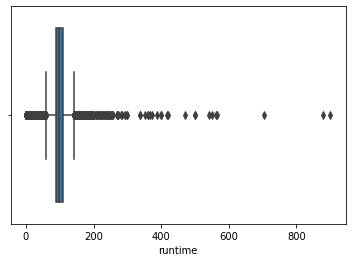

In [14]:
# Now, we check our runtime column for outlier values
print(f"The mean of the runtime column is {round(movie_data['runtime'].mean(),2)}")
print(f"The median of the runtime column is {round(movie_data['runtime'].median(),2)}")
print(f"The standard deviation of the runtime column is {round(movie_data['runtime'].std(),2)}")

sns.boxplot(x=movie_data['runtime']);

We can therefore observe that values over 240 minutes of play time are considered outliers.

For this observation, we wouldn't be using the runtime for our analysis at this time due to the timeframe for submission.

Let's see the positions of our outliers.

In [15]:
np.where(movie_data['runtime'] >= 240)

(array([  415,   559,   609,  1183,  1235,  1678,  1802,  1865,  2107,
         2170,  2214,  2393,  2630,  2722,  2843,  3141,  3356,  3772,
         3826,  3886,  3894,  4030,  4041,  4098,  4198,  4306,  4788,
         4864,  4939,  5121,  5163,  5330,  6008,  6176,  6181,  6453,
         6829,  6894,  7256,  7267,  7608,  8173,  8573,  8766,  8768,
         9300, 10304, 10443]),)

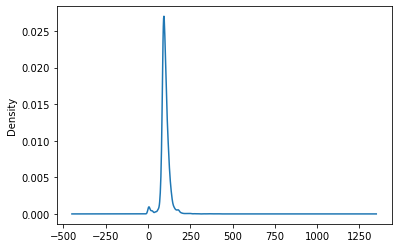

In [16]:
movie_data['runtime'].plot(kind='kde');

#### Multi-variate Analysis

Here we will examine how the features relate to each other

In [17]:
#Check how each features relate with each other and our assumed target variable for this analysis.
movie_data.corr(method ='pearson') 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


By examining this correlation table we can see some features that could likely influence the revenue generated from each movie produced. 

They are:

1. Popularity
2. budget
3. Vote count

These all have over 50% correlation with our presumed target variable for this analysis (Revenue)

Let's use a scatter plot to visualize the relationships between these variables and our target variable

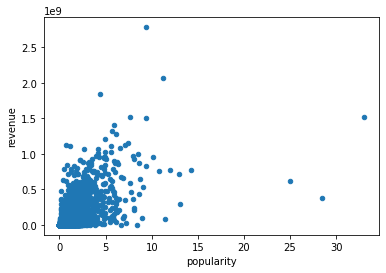

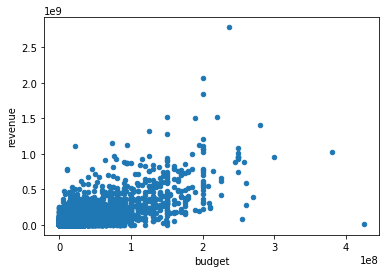

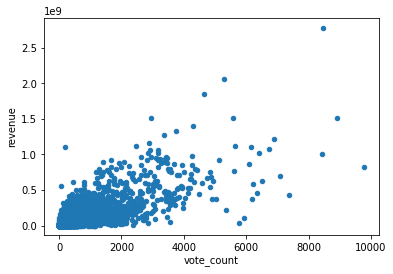

In [18]:
#Visualizing the correlation
columns = ['popularity', 'budget', 'vote_count']
for col in columns:
  movie_data.plot(kind='scatter', x= col, y='revenue')


In [19]:
movie_data.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

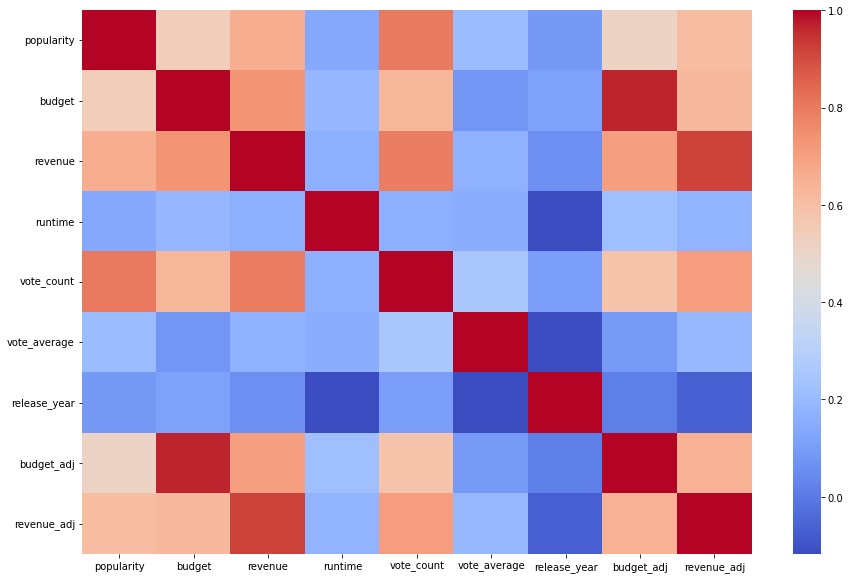

In [20]:
#To visualize our correlation with a heatmap, we have to drop the categorical variables

#assign new dataframe with only numerical variables
corr_df = movie_data.drop(['id', 'original_title', 'director', 'genres', 'production_companies', 'release_date'], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(corr_df.corr(), cmap='coolwarm')

Just as we inferred from our correlation table, we can see how these three respective variables have a pretty strong correlation with our target variable (Revenue)

### Research Questions

#### Finding the movie with the highest revenue

In [56]:
# Define a new dataframe with different movies and their revenuew
top_revenue_movies = movie_data[['revenue', 'original_title', 'release_year', 'director']].sort_values('revenue', ascending=False)
#top_revenue_movies['revenue']= top_revenue_movies['revenue'].apply(lambda x: "${:.4f}k".format((x/1000))) #convert revenue column to currency
top_revenue_movies[:1]

,revenue,original_title,release_year,director
1386,2781505847,Avatar,2009,James Cameron


Avatar, released in 2009 appears to have the highest revenue so far.


### Finding the overall most popular movie

In [44]:
most_popular_movie = movie_data[['release_year', 'original_title', 'popularity']].sort_values('popularity', ascending=False)[:1]
most_popular_movie

,release_year,original_title,popularity
0,2015,Jurassic World,32.985763




### Movie with the highest average rating

In [59]:
most_voted_movie = movie_data[['original_title', 'vote_average']].sort_values('vote_average', ascending=False)[:1]
most_voted_movie

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2


## Conclusion

We highlighted at the introductory session, the questions we sought to answer with this analysis, which are:

1. Finding the movie with the highest revenue generated
2. The most popular movie
3. Movie with the highest number of average votes

Avatar, released in 2009, is the highest revenue generating movie in our distribution.

Jurassic World, released in 2015, is th emost popular movie

The Story of Film: An Odyssey is the movie with the highest number of average votes.

The researcher also made some discoveries while exploring the dataset.

The researcher discovered 3 variables that are highly corellated to the revenue generated by movies and they are

i. Popularity
ii Vote count
iii Movie Budget

While we do not presume causation, we only identified a relationship between these variables and the target variable. This was achieved through a correlation analysis of all numerical variables in the dataset.


The researcher would further explore the genres of the movies at a later date to try and discover the genres associated with a high level of movie success in terms of popularity and revenue when knowledge on how to peoperly do that is acquired.


Thank you